### Imports

In [1]:
# !pip install matplotlib==3.5.0 

In [2]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import time
from typing import List
import random as rnd
import matplotlib
import json
import re
# from mpl_toolkits.mplot3d import Axes3D
# from scipy import interpolate

### Global Constants

In [3]:
agent_num = 1000
search_iteration = 250
landscape_repetitions = 100

### Data Ingestion

In [4]:
NCK__N12_separate = {}
NCK__N12_together = {}
NCK__N6_separate = {}
NCK__N6_together = {}

multiGoal__N12_separate = {}
multiGoal__N12_together = {}
multiGoal__N6_separate = {}
multiGoal__N6_together = {}

modularity_together = {}
modularity_separate = {}

resource_availability_together = {}
resource_availability_separate = {}

uncertainty_together = {}
uncertainty_separate = {}


## When running locally or elsewhere, replace the file path(s) with the correct path(s)
with open('/content/noCrossKnowledge__N12__separate__results.json') as json_file:
    NCK__N12_separate = json.load(json_file)
with open('/content/noCrossKnowledge__N12__together__results.json') as json_file:
    NCK__N12_together = json.load(json_file)
with open('/content/noCrossKnowledge__N6__separate__results.json') as json_file:
    NCK__N6_separate = json.load(json_file)
with open('/content/noCrossKnowledge__N6__together__results.json') as json_file:
    NCK__N6_together = json.load(json_file)

with open('/content/multiGoal__N12__separate__results.json') as json_file:
    multiGoal__N12_separate = json.load(json_file)
with open('/content/multiGoal__N12__together__results.json') as json_file:
    multiGoal__N12_together = json.load(json_file)
with open('/content/multiGoal__N6__separate__results.json') as json_file:
    multiGoal__N6_separate = json.load(json_file)
with open('/content/multiGoal__N6__together__results.json') as json_file:
    multiGoal__N6_together = json.load(json_file)

with open('/content/modularity__N12__separate__results.json') as json_file:
    modularity_separate = json.load(json_file)
with open('/content/modularity__N12__together__results.json') as json_file:
    modularity_together = json.load(json_file)

with open('/content/availability__N12__separate__results.json') as json_file:
    resource_availability_separate = json.load(json_file)
with open('/content/availability__N12__together__results.json') as json_file:
    resource_availability_together = json.load(json_file)

with open('/content/uncertainty__N12__separate__results.json') as json_file:
    uncertainty_separate = json.load(json_file)
with open('/content/uncertainty__N12__together__results.json') as json_file:
    uncertainty_together = json.load(json_file)

### No Cross Knowledge

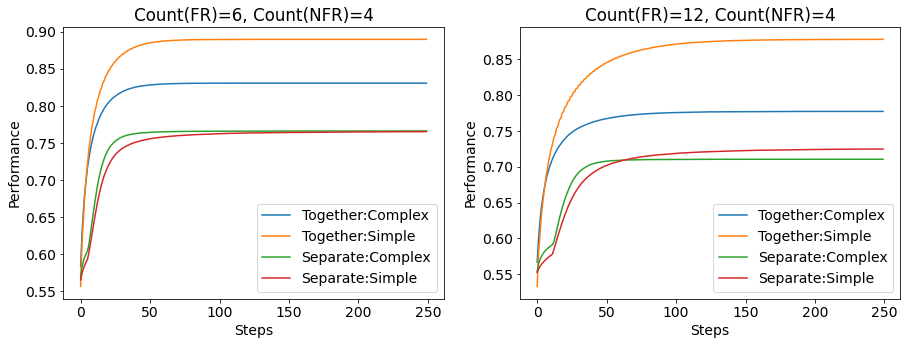

In [5]:
x = range(search_iteration)
plt.subplots(figsize=(15, 5))
font = {'size': 14}
matplotlib.rc('font', **font)


plt.subplot(1, 2, 1)
for name, vals in NCK__N6_together.items():
    plt.plot(x, vals, label=f"Together:{name}")
for name, vals in NCK__N6_separate.items():
    plt.plot(x, vals, label=f"Separate:{name}")
plt.legend()
plt.ylabel("Performance")
plt.xlabel("Steps")
plt.title("Count(FR)=6, Count(NFR)=4")

plt.subplot(1, 2, 2)
for name, vals in NCK__N12_together.items():
    plt.plot(x, vals, label=f"Together:{name}")
for name, vals in NCK__N12_separate.items():
    plt.plot(x, vals, label=f"Separate:{name}")
plt.legend()
plt.ylabel("Performance")
plt.xlabel("Steps")
plt.title("Count(FR)=12, Count(NFR)=4")

plt.show()

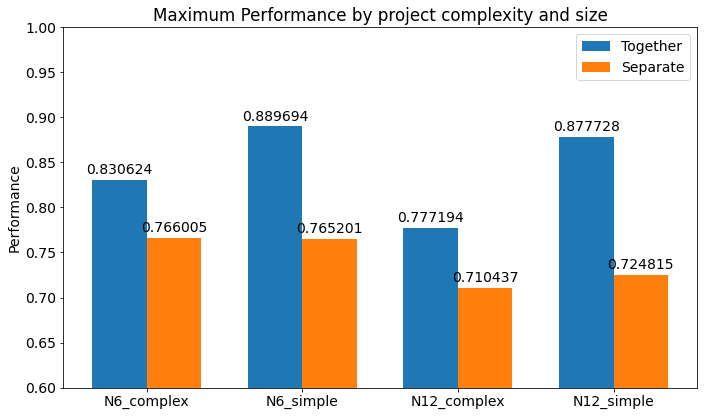

In [6]:
labels = ["N6_complex", "N6_simple", "N12_complex", "N12_simple"]
max_perfomance_together = []
max_performance_seperate = []
for name, vals in NCK__N6_together.items():
    max_perfomance_together.append(vals[-1])
for name, vals in NCK__N6_separate.items():
    max_performance_seperate.append(vals[-1])
for name, vals in NCK__N12_together.items():
    max_perfomance_together.append(vals[-1])
for name, vals in NCK__N12_separate.items():
    max_performance_seperate.append(vals[-1])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, max_perfomance_together, width, label='Together')
rects2 = ax.bar(x + width/2, max_performance_seperate, width, label='Separate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance')
ax.set_title('Maximum Performance by project complexity and size')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

ax.set_ylim([0.6, 1])

fig.tight_layout()

plt.show()

[0.06675685953139066, 0.15291316422939372]


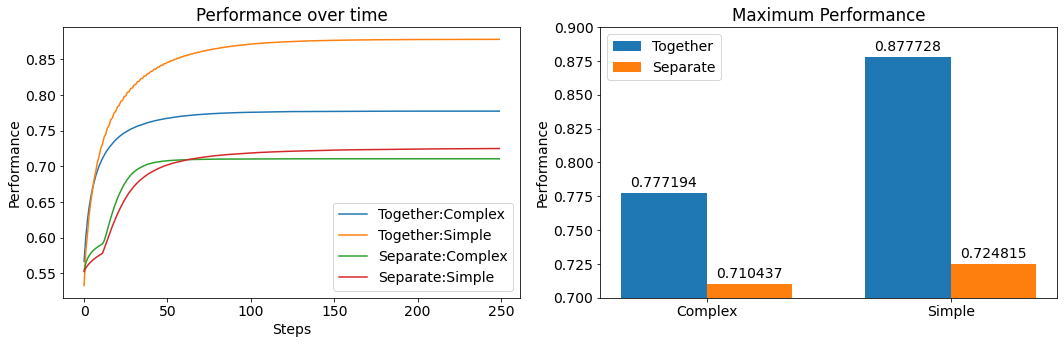

In [7]:
## Just to show N12, no need to show N6
x = range(search_iteration)

font = {'size': 14}
matplotlib.rc('font', **font)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for name, vals in NCK__N12_together.items():
    ax1.plot(x, vals, label=f"Together:{name}")
for name, vals in NCK__N12_separate.items():
    ax1.plot(x, vals, label=f"Separate:{name}")
ax1.legend()
ax1.set_ylabel("Performance")
ax1.set_xlabel("Steps")
ax1.set_title("Performance over time")
#plt.show()


labels = ["Complex", "Simple"]
max_perfomance_together = [] # [n8_simple, n8_complex, n16_simple, n16_complex]
max_performance_seperate = []
for name, vals in NCK__N12_together.items():
    max_perfomance_together.append(vals[-1])
for name, vals in NCK__N12_separate.items():
    max_performance_seperate.append(vals[-1])

diff = []
for i in range(len(labels)):
    diff.append(max_perfomance_together[i]-max_performance_seperate[i])
print(diff)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax2.bar(x - width/2, max_perfomance_together, width, label='Together')
rects2 = ax2.bar(x + width/2, max_performance_seperate, width, label='Separate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Performance')
ax2.set_title('Maximum Performance')
ax2.set_xticks(x, labels)
ax2.legend()

ax2.bar_label(rects1, padding=3)
ax2.bar_label(rects2, padding=3)

ax2.set_ylim([0.7, 0.9])

# ax3 = ax2.twinx()
# # make a plot with different y-axis using second axis object
# ax3.plot(labels, diff , color="red", marker="o")
# ax3.set_ylabel("Difference")#, color="red")#, fontsize=14)
# ax3.set_ylim([0.0, 0.05])
# for x, y in zip(labels, [round(i,6) for i in diff]):
#     label = y
#     ax3.annotate(label, (x, y),  
#                  xycoords="data",
#                  textcoords="offset points",
#                  xytext=(0, 10), ha="center")
    
fig.tight_layout()

plt.show()

### Multi Goal

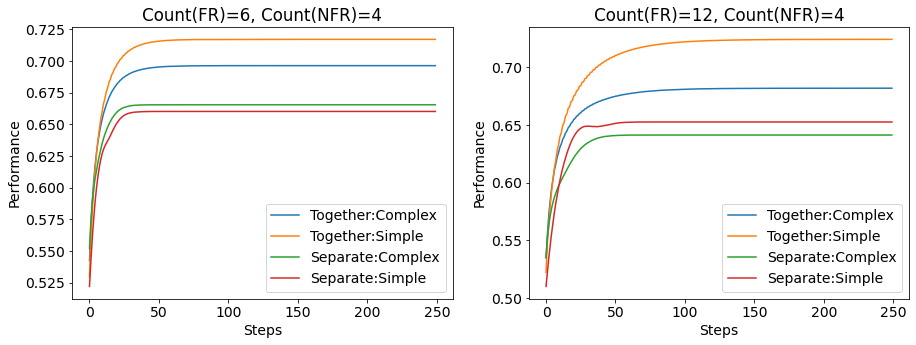

In [8]:
x = range(search_iteration)
plt.subplots(figsize=(15, 5))
font = {'size': 14}
matplotlib.rc('font', **font)


plt.subplot(1, 2, 1)
for name, vals in multiGoal__N6_together.items():
    plt.plot(x, vals, label=f"Together:{name}")
for name, vals in multiGoal__N6_separate.items():
    plt.plot(x, vals, label=f"Separate:{name}")
plt.legend()
plt.ylabel("Performance")
plt.xlabel("Steps")
plt.title("Count(FR)=6, Count(NFR)=4")

plt.subplot(1, 2, 2)
for name, vals in multiGoal__N12_together.items():
    plt.plot(x, vals, label=f"Together:{name}")
for name, vals in multiGoal__N12_separate.items():
    plt.plot(x, vals, label=f"Separate:{name}")
plt.legend()
plt.ylabel("Performance")
plt.xlabel("Steps")
plt.title("Count(FR)=12, Count(NFR)=4")

plt.show()

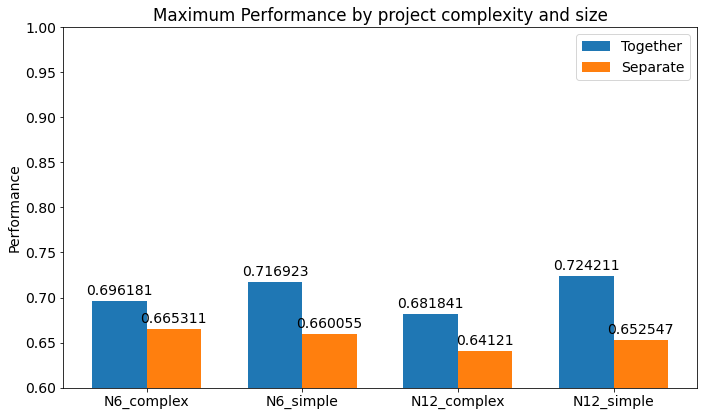

In [9]:
labels = ["N6_complex", "N6_simple", "N12_complex", "N12_simple"]
max_perfomance_together = []
max_performance_seperate = []
for name, vals in multiGoal__N6_together.items():
    max_perfomance_together.append(vals[-1])
for name, vals in multiGoal__N6_separate.items():
    max_performance_seperate.append(vals[-1])
for name, vals in multiGoal__N12_together.items():
    max_perfomance_together.append(vals[-1])
for name, vals in multiGoal__N12_separate.items():
    max_performance_seperate.append(vals[-1])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, max_perfomance_together, width, label='Together')
rects2 = ax.bar(x + width/2, max_performance_seperate, width, label='Separate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance')
ax.set_title('Maximum Performance by project complexity and size')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

ax.set_ylim([0.6, 1])

fig.tight_layout()

plt.show()

[0.040631360503190606, 0.07166374778564666]


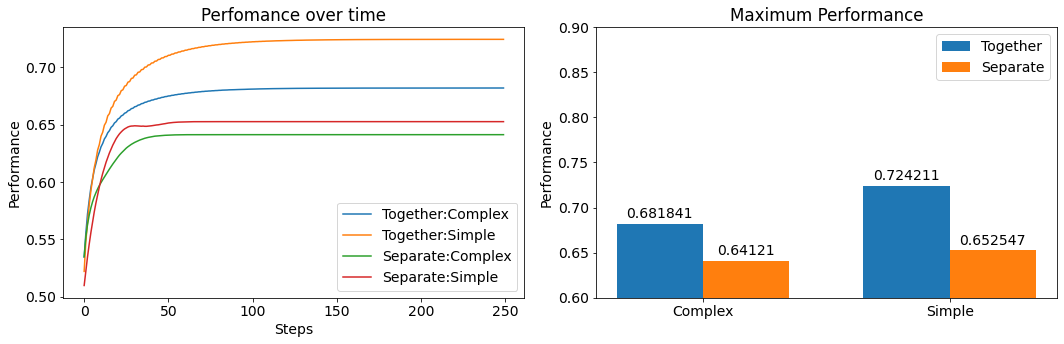

In [10]:
## Just to show N12, no need to show N6
x = range(search_iteration)

font = {'size': 14}
matplotlib.rc('font', **font)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for name, vals in multiGoal__N12_together.items():
    ax1.plot(x, vals, label=f"Together:{name}")
for name, vals in multiGoal__N12_separate.items():
    ax1.plot(x, vals, label=f"Separate:{name}")
ax1.legend()
ax1.set_ylabel("Performance")
ax1.set_xlabel("Steps")
ax1.set_title("Perfomance over time")
#plt.show()


labels = ["Complex", "Simple"]
max_perfomance_together = [] # [n8_simple, n8_complex, n16_simple, n16_complex]
max_performance_seperate = []
for name, vals in multiGoal__N12_together.items():
    max_perfomance_together.append(vals[-1])
for name, vals in multiGoal__N12_separate.items():
    max_performance_seperate.append(vals[-1])

diff = []
for i in range(len(labels)):
    diff.append(max_perfomance_together[i]-max_performance_seperate[i])
print(diff)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax2.bar(x - width/2, max_perfomance_together, width, label='Together')
rects2 = ax2.bar(x + width/2, max_performance_seperate, width, label='Separate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Performance')
ax2.set_title('Maximum Performance')
ax2.set_xticks(x, labels)
ax2.legend()

ax2.bar_label(rects1, padding=3)
ax2.bar_label(rects2, padding=3)

ax2.set_ylim([0.6, 0.9])

# ax3 = ax2.twinx()
# # make a plot with different y-axis using second axis object
# ax3.plot(labels, diff , color="red", marker="o")
# ax3.set_ylabel("Difference")#, color="red")#, fontsize=14)
# ax3.set_ylim([0.0, 0.05])
# for x, y in zip(labels, [round(i,6) for i in diff]):
#     label = y
#     ax3.annotate(label, (x, y),  
#                  xycoords="data",
#                  textcoords="offset points",
#                  xytext=(0, 10), ha="center")
    
fig.tight_layout()

plt.show()

### Modularity

[0.01732281965240734, 0.018176257878969593]


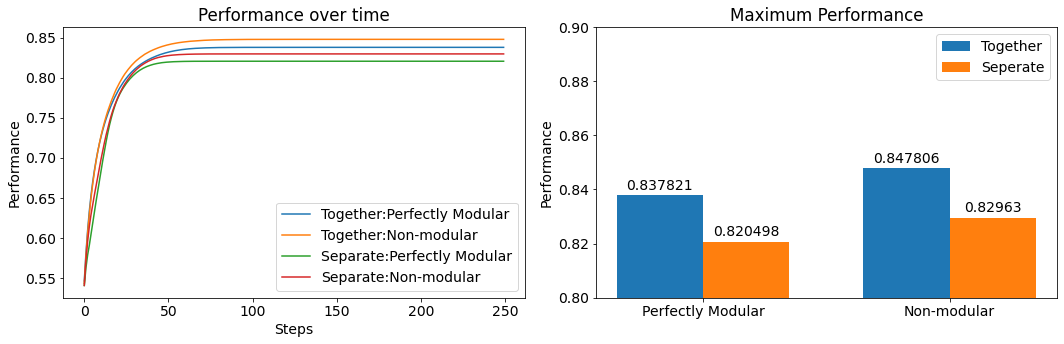

In [11]:
x = range(search_iteration)

font = {'size': 14}
matplotlib.rc('font', **font)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for name, vals in modularity_together.items():
    ax1.plot(x, vals, label=f"Together:{name}")
for name, vals in modularity_separate.items():
    ax1.plot(x, vals, label=f"Separate:{name}")
ax1.legend()
ax1.set_ylabel("Performance")
ax1.set_xlabel("Steps")
ax1.set_title("Performance over time")
#plt.show()


labels = ["Perfectly Modular", "Non-modular"]
max_perfomance_together = [] # [n8_simple, n8_complex, n16_simple, n16_complex]
max_performance_seperate = []
for name, vals in modularity_together.items():
    max_perfomance_together.append(vals[-1])
for name, vals in modularity_separate.items():
    max_performance_seperate.append(vals[-1])

diff = []
for i in range(len(labels)):
    diff.append(max_perfomance_together[i]-max_performance_seperate[i])
print(diff)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax2.bar(x - width/2, max_perfomance_together, width, label='Together')
rects2 = ax2.bar(x + width/2, max_performance_seperate, width, label='Seperate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Performance')
ax2.set_title('Maximum Performance')
ax2.set_xticks(x, labels)
ax2.legend()

ax2.bar_label(rects1, padding=3)
ax2.bar_label(rects2, padding=3)

ax2.set_ylim([0.8, 0.9])

# ax3 = ax2.twinx()
# # make a plot with different y-axis using second axis object
# ax3.plot(labels, diff , color="red", marker="o")
# ax3.set_ylabel("Difference")#, color="red")#, fontsize=14)
# ax3.set_ylim([0.0, 0.05])
# for x, y in zip(labels, [round(i,6) for i in diff]):
#     label = y
#     ax3.annotate(label, (x, y),  
#                  xycoords="data",
#                  textcoords="offset points",
#                  xytext=(0, 10), ha="center")
    
fig.tight_layout()

plt.show()

### Resource Availability

[0.013861844656678834, 0.013169983825325193, 0.02051403862964085]


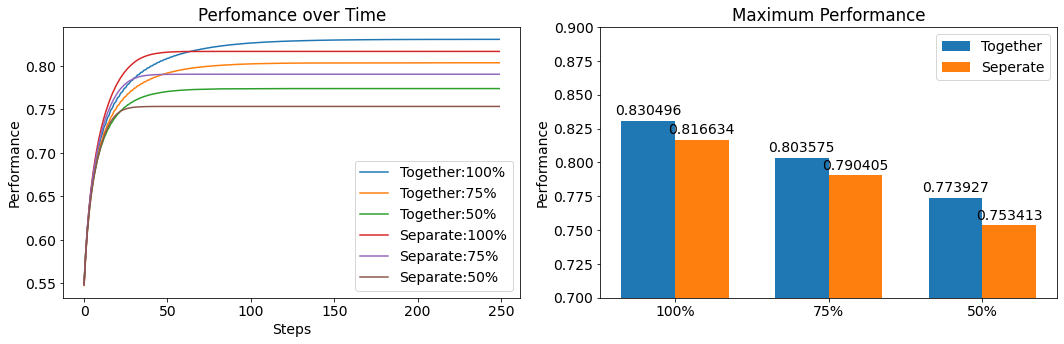

In [12]:
x = range(search_iteration)

font = {'size': 14}
matplotlib.rc('font', **font)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for name, vals in resource_availability_together.items():
    ax1.plot(x, vals, label=f"Together:{'75%' if name == '70%' else name}") # typo in my python script
for name, vals in resource_availability_separate.items():
    ax1.plot(x, vals, label=f"Separate:{'75%' if name == '70%' else name}")# typo in my python script
ax1.legend()
ax1.set_ylabel("Performance")
ax1.set_xlabel("Steps")
ax1.set_title("Perfomance over Time")
#plt.show()


labels = ["100%", "75%" ,"50%"]
max_perfomance_together = [] # [n8_simple, n8_complex, n16_simple, n16_complex]
max_performance_seperate = []
for name, vals in resource_availability_together.items():
    max_perfomance_together.append(vals[-1])
for name, vals in resource_availability_separate.items():
    max_performance_seperate.append(vals[-1])

diff = []
for i in range(len(labels)):
    diff.append(max_perfomance_together[i]-max_performance_seperate[i])
print(diff)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax2.bar(x - width/2, max_perfomance_together, width, label='Together')
rects2 = ax2.bar(x + width/2, max_performance_seperate, width, label='Seperate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Performance')
ax2.set_title('Maximum Performance')
ax2.set_xticks(x, labels)
ax2.legend()

ax2.bar_label(rects1, padding=3)
ax2.bar_label(rects2, padding=3)

ax2.set_ylim([0.7, 0.9])

# ax3 = ax2.twinx()
# # make a plot with different y-axis using second axis object
# ax3.plot(labels, diff , color="red", marker="o")
# ax3.set_ylabel("Difference")#, color="red")#, fontsize=14)
# ax3.set_ylim([0.0, 0.05])
# for x, y in zip(labels, [round(i,6) for i in diff]):
#     label = y
#     ax3.annotate(label, (x, y),  
#                  xycoords="data",
#                  textcoords="offset points",
#                  xytext=(0, 10), ha="center")
    
fig.tight_layout()

plt.show()

### Uncertainty

[0.0259503641027391, 0.03386870903695938, -0.016168455942482618]


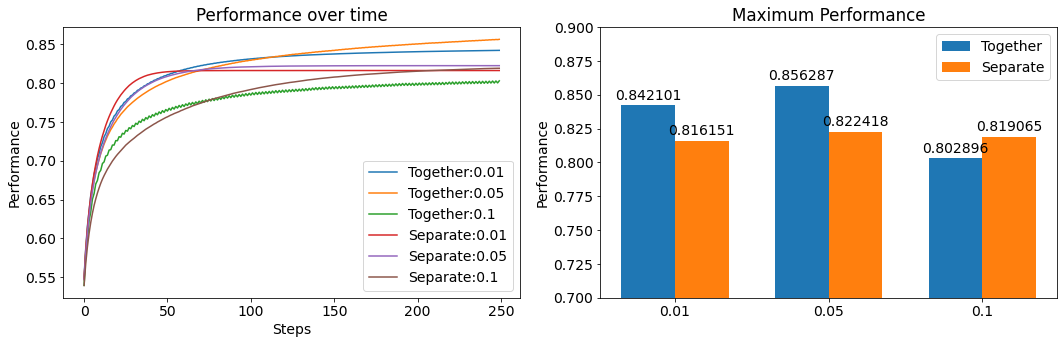

In [13]:
x = range(search_iteration)

font = {'size': 14}
matplotlib.rc('font', **font)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for name, vals in uncertainty_together.items():
    ax1.plot(x, vals, label=f"Together:{'75%' if name == '70%' else name}") # typo in my python script
for name, vals in uncertainty_separate.items():
    ax1.plot(x, vals, label=f"Separate:{'75%' if name == '70%' else name}")# typo in my python script
ax1.legend()
ax1.set_ylabel("Performance")
ax1.set_xlabel("Steps")
ax1.set_title("Performance over time")
#plt.show()


labels = ["0.01", "0.05" ,"0.1"]
max_perfomance_together = [] # [n8_simple, n8_complex, n16_simple, n16_complex]
max_performance_seperate = []
for name, vals in uncertainty_together.items():
    max_perfomance_together.append(vals[-1])
for name, vals in uncertainty_separate.items():
    max_performance_seperate.append(vals[-1])

diff = []
for i in range(len(labels)):
    diff.append(max_perfomance_together[i]-max_performance_seperate[i])
print(diff)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax2.bar(x - width/2, max_perfomance_together, width, label='Together')
rects2 = ax2.bar(x + width/2, max_performance_seperate, width, label='Separate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Performance')
ax2.set_title('Maximum Performance')
ax2.set_xticks(x, labels)
ax2.legend()

ax2.bar_label(rects1, padding=3)
ax2.bar_label(rects2, padding=3)

ax2.set_ylim([0.7, 0.9])

# ax3 = ax2.twinx()
# # make a plot with different y-axis using second axis object
# ax3.plot(labels, diff , color="red", marker="o")
# ax3.set_ylabel("Difference")#, color="red")#, fontsize=14)
# ax3.set_ylim([0.0, 0.05])
# for x, y in zip(labels, [round(i,6) for i in diff]):
#     label = y
#     ax3.annotate(label, (x, y),  
#                  xycoords="data",
#                  textcoords="offset points",
#                  xytext=(0, 10), ha="center")
    
fig.tight_layout()

plt.show()